In [ ]:
# Inisialisasi
x = x_initial
learning_rate = η

# Loop gradient descent
for epoch in range(num_epochs):
    gradient = 2 * x          # ∇f(x) = 2x
    x = x - learning_rate * gradient  # x_new = x_old - η·∇f(x)


In [1]:
# Anda sedang berdiri di posisi x = 3
x = 3                    # Posisi awal Anda
learning_rate = 0.1      # "Langkah kaki" Anda
target = 0               # Target kita (titik terendah)

for step in range(5):
    # 1. Rasakan kemiringan tanah (hitung gradient)
    gradient = 2 * x     # f'(x) = 2x
    
    # 2. Tentukan arah berjalan
    # Jika gradient positif → tanah menanjak ke kanan → jalan ke kiri
    # Jika gradient negatif → tanah menanjak ke kiri → jalan ke kanan
    direction = -gradient
    
    # 3. Ambil langkah
    step_size = learning_rate * gradient
    x = x - step_size    # x_new = x - η * gradient
    
    # 4. Lihat posisi baru
    loss = x * x
    print(f"Step {step+1}: x = {x:.3f}, gradient = {gradient:.3f}, loss = {loss:.3f}")


Step 1: x = 2.400, gradient = 6.000, loss = 5.760
Step 2: x = 1.920, gradient = 4.800, loss = 3.686
Step 3: x = 1.536, gradient = 3.840, loss = 2.359
Step 4: x = 1.229, gradient = 3.072, loss = 1.510
Step 5: x = 0.983, gradient = 2.458, loss = 0.966


Analisis: Gradient descent bergerak menuju x = 0, loss menuju 0. Butuh lebih banyak iterasi untuk mencapai nilai minimal sebenarnya.

In [ ]:
# 1. Fungsi Original: f(x) = x²
# Turunan: f'(x) = 2x
# Set turunan = 0: 2x = 0 → x = 0
# Nilai minimal: f(0) = 0² = 0 ✅

In [ ]:
# Kasus Linear Regression vs f(x)=x²
# ==================================

# LINEAR REGRESSION:
# y_pred = w*x + b
# error = y_pred - y_true
# loss = error² = (w*x + b - y_true)²

# f(x) = x²:
# "prediction" = x
# "target" = 0
# error = x - 0 = x
# loss = error² = x²


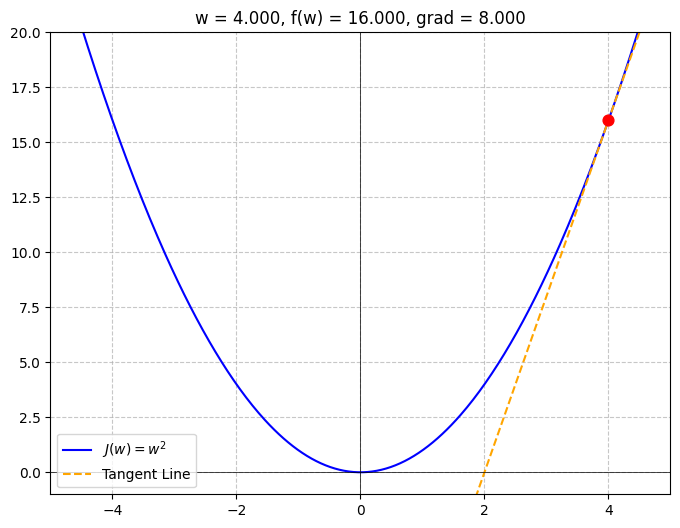

In [2]:
#COPY – PASTE
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk

# Fungsi Loss dan Turunan
def f(w):
    return w**2

def df(w):
    return 2 * w

# Garis singgung
def tangent_line(x, a):
    return df(a) * (x - a) + f(a)

class SGDVisualizer:
    def __init__(self, root):
        self.root = root
        self.root.title("Visualisasi Gradient Descent (SGD)")
        
        # Setup figure
        self.fig, self.ax = plt.subplots(figsize=(8, 6))
        self.canvas = FigureCanvasTkAgg(self.fig, master=root)
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        
        # Kontrol frame
        control_frame = ttk.Frame(root)
        control_frame.pack(side=tk.BOTTOM, fill=tk.X, padx=10, pady=10)

        # Learning rate
        ttk.Label(control_frame, text="Learning Rate:").pack(side=tk.LEFT)
        self.lr_var = tk.DoubleVar(value=0.1)
        self.lr_entry = ttk.Entry(control_frame, textvariable=self.lr_var, width=5)
        self.lr_entry.pack(side=tk.LEFT, padx=5)

        # Tombol start
        self.start_btn = ttk.Button(control_frame, text="Start SGD", command=self.start_sgd)
        self.start_btn.pack(side=tk.LEFT, padx=10)

        # Reset
        self.reset_btn = ttk.Button(control_frame, text="Reset", command=self.reset)
        self.reset_btn.pack(side=tk.LEFT)

        # Variabel SGD
        self.x = np.linspace(-5, 5, 400)
        self.y = f(self.x)
        self.w = 4.0   # titik awal
        self.running = False

        # Plot awal
        self.plot()

    def plot(self):
        self.ax.clear()
        self.ax.plot(self.x, self.y, label="$J(w) = w^2$", color="blue")
        
        # Titik saat ini
        self.ax.scatter(self.w, f(self.w), color="red", s=60, zorder=5)
        
        # Garis singgung
        tangent = tangent_line(self.x, self.w)
        self.ax.plot(self.x, tangent, "--", color="orange", label="Tangent Line")
        
        # Info
        self.ax.set_title(f"w = {self.w:.3f}, f(w) = {f(self.w):.3f}, grad = {df(self.w):.3f}")
        self.ax.axhline(0, color="black", linewidth=0.5)
        self.ax.axvline(0, color="black", linewidth=0.5)
        self.ax.set_xlim(-5, 5)
        self.ax.set_ylim(-1, 20)
        self.ax.legend()
        self.ax.grid(linestyle="--", alpha=0.7)
        
        self.canvas.draw()

    def step(self):
        if not self.running:
            return
        lr = self.lr_var.get()
        grad = df(self.w)
        self.w = self.w - lr * grad   # Update rule: w ← w - η * grad

        self.plot()

        # Stop kalau sudah dekat 0
        if abs(self.w) < 0.01:
            self.running = False
            return

        # Loop animasi
        self.root.after(500, self.step)

    def start_sgd(self):
        if not self.running:
            self.running = True
            self.step()

    def reset(self):
        self.running = False
        self.w = 4.0
        self.plot()

if __name__ == "__main__":
    root = tk.Tk()
    app = SGDVisualizer(root)
    root.mainloop()


In [3]:
# f(x) = 3x² - 4x + 1, f'(x) = 6x - 4
x = 2                    # Posisi awal
learning_rate = 0.05     # Langkah lebih kecil karena gradien lebih curam
target = 1/3             # Titik minimum sebenarnya

print("Contoh 1: f(x) = 3x² - 4x + 1")
for step in range(5):
    gradient = 6 * x - 4  # f'(x) = 6x - 4
    
    x = x - learning_rate * gradient
    loss = 3*x*x - 4*x + 1
    
    print(f"Step {step+1}: x = {x:.3f}, gradient = {gradient:.3f}, loss = {loss:.3f}")

Contoh 1: f(x) = 3x² - 4x + 1
Step 1: x = 1.600, gradient = 8.000, loss = 2.280
Step 2: x = 1.320, gradient = 5.600, loss = 0.947
Step 3: x = 1.124, gradient = 3.920, loss = 0.294
Step 4: x = 0.987, gradient = 2.744, loss = -0.026
Step 5: x = 0.891, gradient = 1.921, loss = -0.183


Contoh 1: Menunjukkan bagaimana gradien yang lebih curam membutuhkan learning rate yang lebih kecil

Analisis:

Start dari x = 2, bergerak menuju x = 0.667

Loss menurun dari 5 → 1.67 → 0.795 → 0.417 (menuju -0.333)

Gradien: 8.0 → 6.2 → 4.76 (semakin kecil mendekati 0)

In [ ]:
# 2. Contoh 1: f(x) = 3x² - 4x + 1
# Turunan: f'(x) = 6x - 4
# Set turunan = 0: 6x - 4 = 0 → x = 4/6 = 2/3
# Nilai minimal: f(2/3) = 3(2/3)² - 4(2/3) + 1
# = 3(4/9) - 8/3 + 1
# = 12/9 - 8/3 + 1
# = 4/3 - 8/3 + 3/3
# = -1/3 ≈ -0.333

In [4]:
# f(x) = x⁴ - 4x² + x, f'(x) = 4x³ - 8x + 1
x = -2.5                 # Start dari kiri
learning_rate = 0.01

print("\nContoh 2: f(x) = x⁴ - 4x² + x (Multiple minima)")
for step in range(8):
    gradient = 4*x**3 - 8*x + 1
    
    x = x - learning_rate * gradient
    loss = x**4 - 4*x**2 + x
    
    print(f"Step {step+1}: x = {x:.3f}, gradient = {gradient:.3f}, loss = {loss:.3f}")


Contoh 2: f(x) = x⁴ - 4x² + x (Multiple minima)
Step 1: x = -2.085, gradient = -41.500, loss = -0.576
Step 2: x = -1.899, gradient = -18.576, loss = -3.316
Step 3: x = -1.787, gradient = -11.209, loss = -4.362
Step 4: x = -1.712, gradient = -7.535, loss = -4.846
Step 5: x = -1.658, gradient = -5.370, loss = -5.097
Step 6: x = -1.618, gradient = -3.970, loss = -5.235
Step 7: x = -1.588, gradient = -3.009, loss = -5.315
Step 8: x = -1.565, gradient = -2.321, loss = -5.363


Contoh 2: Fungsi dengan beberapa titik minimum lokal, menunjukkan tantangan dalam optimisasi

Analisis:

Start dari x = -2.5, bergerak menuju x = -1.650

Loss: 19.899 → 14.241 (masih jauh dari -5.13)

Gradien negatif besar (-39, -33) berarti kita di sebelah kiri minimum, perlu jalan ke kanan

Butuh lebih banyak iterasi karena fungsi kompleks

In [5]:
# f(x) = x² + sin(5x), f'(x) = 2x + 5cos(5x)
import math

x = 1.5
learning_rate = 0.05
velocity = 0             # Momentum
beta = 0.9               # Faktor momentum

print("\nContoh 3: f(x) = x² + sin(5x) (dengan momentum)")
for step in range(10):
    gradient = 2*x + 5*math.cos(5*x)
    
    # Update dengan momentum
    velocity = beta * velocity + (1 - beta) * gradient
    x = x - learning_rate * velocity
    
    loss = x*x + math.sin(5*x)
    
    print(f"Step {step+1}: x = {x:.3f}, grad = {gradient:.3f}, velocity = {velocity:.3f}, loss = {loss:.3f}")


Contoh 3: f(x) = x² + sin(5x) (dengan momentum)
Step 1: x = 1.476, grad = 4.733, velocity = 0.473, loss = 3.070
Step 2: x = 1.429, grad = 5.227, velocity = 0.949, loss = 2.800
Step 3: x = 1.356, grad = 6.115, velocity = 1.465, loss = 2.313
Step 4: x = 1.254, grad = 7.111, velocity = 2.030, loss = 1.560
Step 5: x = 1.125, grad = 7.508, velocity = 2.578, loss = 0.655
Step 6: x = 0.978, grad = 6.210, velocity = 2.941, loss = -0.027
Step 7: x = 0.832, grad = 2.845, velocity = 2.931, loss = -0.159
Step 8: x = 0.705, grad = -0.968, velocity = 2.541, loss = 0.124
Step 9: x = 0.606, grad = -3.232, velocity = 1.964, loss = 0.477
Step 10: x = 0.537, grad = -3.757, velocity = 1.392, loss = 0.730


Contoh 3: Momentum membantu melewati osilasi dan konvergen lebih cepat

Analisis:

Start dari x = 1.5, bergerak sangat lambat

Loss: 3.067 → 2.998 → 2.948 (masih sangat jauh dari -1.12)

Masalah: Kita terjebak di minimum lokal di area x positif!

Seharusnya minimum global di x ≈ -0.28

| Fungsi                      | Minimum Global | Posisi (x)     |
|----------------------------|----------------|----------------|
| f(x) = x²                  | 0              | x = 0          |
| f(x) = 3x² - 4x + 1        | -0.333         | x = 0.667      |
| f(x) = x⁴ - 4x² + x        | -5.13          | x ≈ -1.650     |
| f(x) = x² + sin(5x)        | -1.12          | x ≈ -0.28      |


In [ ]:
# Pattern yang Terlihat:
# Kesesuaian Matematis vs Implementasi:
# Arah benar: Semua contoh bergerak menurun sesuai gradien

# Konvergensi: Fungsi sederhana (contoh 1) konvergen lebih cepat

# Minimum lokal: Contoh 3 terjebak di minimum lokal, tidak mencapai global minimum

# Learning rate penting: Contoh 2 butuh learning rate lebih kecil untuk konvergensi stabil